              timestamp  hour  day_of_week  temperature   humidity  canceled_requests  ride_requests
0   2024-01-01 00:00:00     6            6    26.805279  38.251426                  9             24
1   2024-01-01 01:00:00    19            0    23.664935  50.448942                  0             60
2   2024-01-01 02:00:00    14            1    34.687028  39.889481                  6             62
3   2024-01-01 03:00:00    10            5    17.991613  40.234915                  4             40
4   2024-01-01 04:00:00     7            5    24.291972  86.886499                  0             46
5   2024-01-01 05:00:00    20            4    28.609133  56.714767                  0             86
6   2024-01-01 06:00:00     6            5    22.910902  77.328136                  0             22
7   2024-01-01 07:00:00    18            2    34.493997  68.376334                  8             70
8   2024-01-01 08:00:00    22            6    29.437753  70.585582                  2      

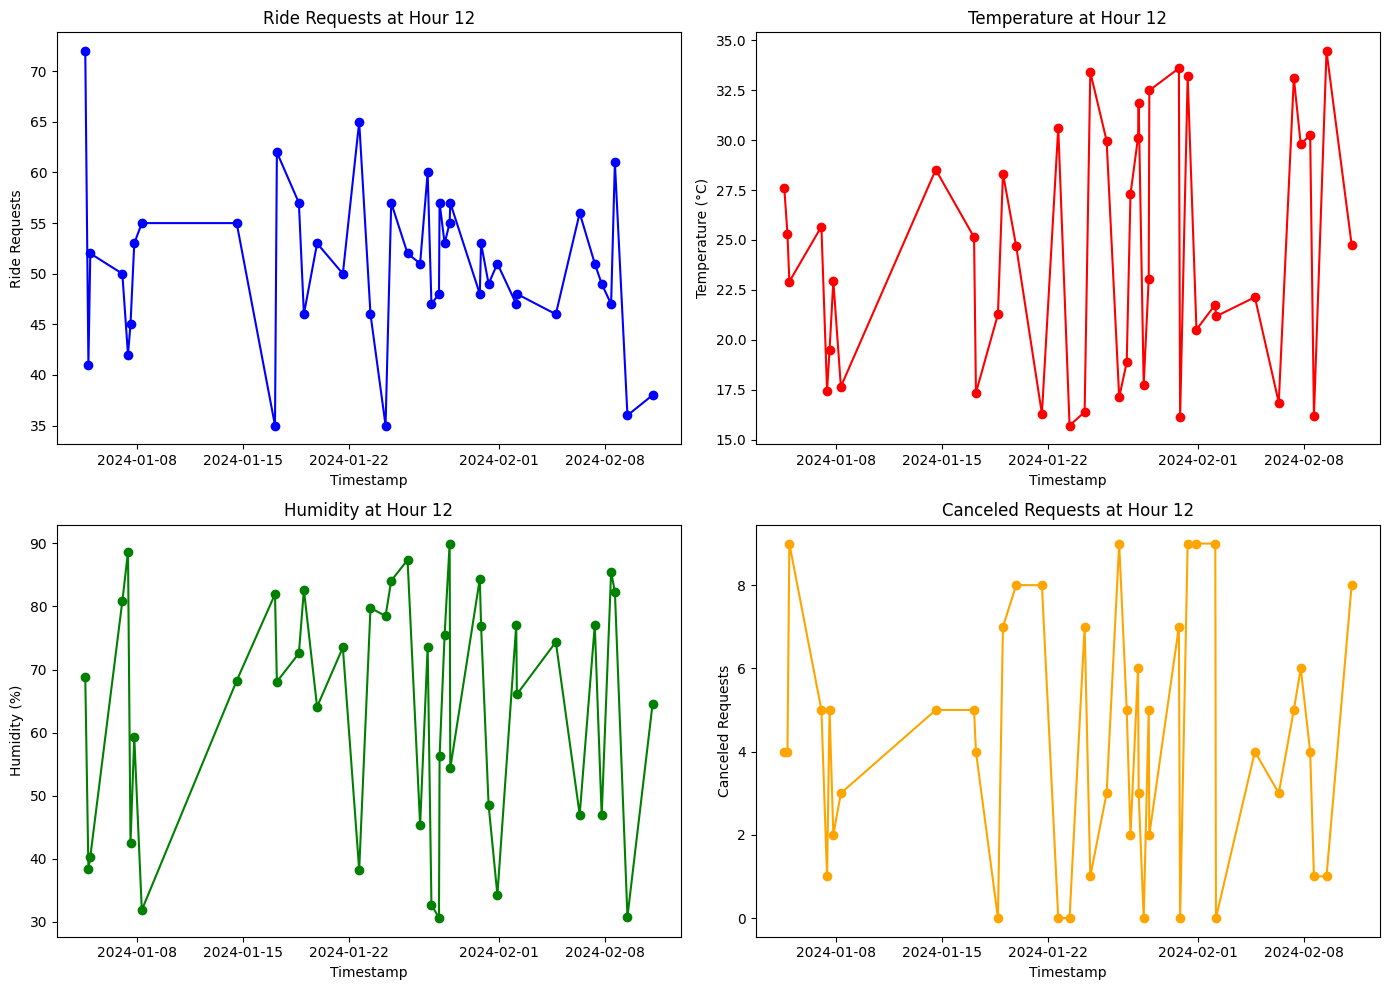

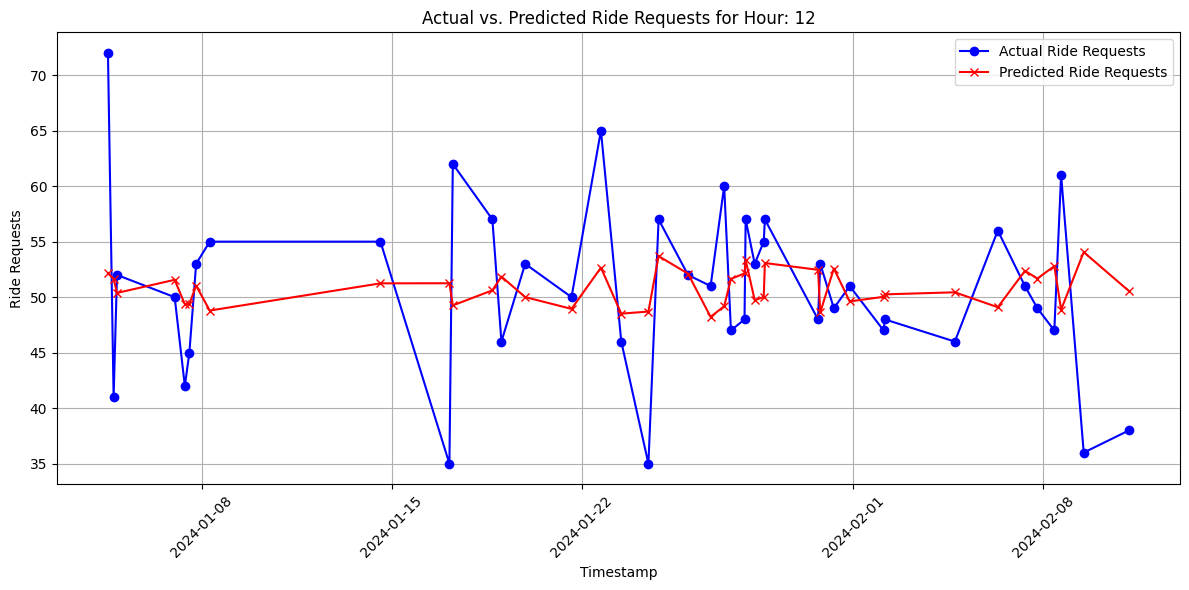

Number of actual ride requests made in hour 12: 2131
Number of predicted ride requests for hour 12: 2133.949103654987


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_records = 1000
hours = np.random.randint(0, 24, num_records)
days_of_week = np.random.randint(0, 7, num_records)
temperature = np.random.uniform(low=15, high=35, size=num_records)
humidity = np.random.uniform(low=30, high=90, size=num_records)
canceled_requests = np.random.randint(0, 10, num_records)
ride_requests = (50 + 20 * np.sin((hours - 12) * np.pi / 12) + 10 * np.random.randn(num_records)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01', periods=num_records, freq='H'),
    'hour': hours,
    'day_of_week': days_of_week,
    'temperature': temperature,
    'humidity': humidity,
    'canceled_requests': canceled_requests,
    'ride_requests': ride_requests
})
# Set display options to show the entire DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Save the DataFrame to a CSV file
df.to_csv(r'C:\Users\HP\Downloads\ride_requests.csv', index=False)
print(df)
# Features and target columns
features = ['hour', 'day_of_week', 'temperature', 'humidity', 'canceled_requests']
target = 'ride_requests'

X = df[features]
y = df[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')


# Specify the hour to filter
hour_to_plot = 12  # Change this to the hour you want to plot

# Filter data for the specified hour
filtered_df = df[df['hour'] == hour_to_plot]

# Plot the data
plt.figure(figsize=(14, 10))

# Plot ride requests
plt.subplot(2, 2, 1)
plt.plot(filtered_df['timestamp'], filtered_df['ride_requests'], marker='o', linestyle='-', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Ride Requests')
plt.title(f'Ride Requests at Hour {hour_to_plot}')

# Plot temperature
plt.subplot(2, 2, 2)
plt.plot(filtered_df['timestamp'], filtered_df['temperature'], marker='o', linestyle='-', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature at Hour {hour_to_plot}')

# Plot humidity
plt.subplot(2, 2, 3)
plt.plot(filtered_df['timestamp'], filtered_df['humidity'], marker='o', linestyle='-', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title(f'Humidity at Hour {hour_to_plot}')

# Plot canceled requests
plt.subplot(2, 2, 4)
plt.plot(filtered_df['timestamp'], filtered_df['canceled_requests'], marker='o', linestyle='-', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Canceled Requests')
plt.title(f'Canceled Requests at Hour {hour_to_plot}')

plt.tight_layout()
plt.show()
# Make predictions on the entire dataset for comparison
df['predicted_ride_requests'] = model.predict(X[features])

# Specify the hour to plot
selected_hour = 12 # Replace with the desired hour

# Filter the DataFrame for the specified hour
df_filtered = df[df['hour'] == selected_hour]

# Plot the actual vs. predicted ride requests
plt.figure(figsize=(12, 6))

# Plot actual ride requests
plt.plot(df_filtered['timestamp'], df_filtered['ride_requests'], label='Actual Ride Requests', color='blue', marker='o')

# Plot predicted ride requests
plt.plot(df_filtered['timestamp'], df_filtered['predicted_ride_requests'], label='Predicted Ride Requests', color='red', marker='x')

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Ride Requests')
plt.title(f'Actual vs. Predicted Ride Requests for Hour: {selected_hour}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
# Calculate and print the number of requests made in that hour
num_requests = df_filtered['ride_requests'].sum()
num_predicted_requests = df_filtered['predicted_ride_requests'].sum()

print(f"Number of actual ride requests made in hour {selected_hour}: {num_requests}")
print(f"Number of predicted ride requests for hour {selected_hour}: {num_predicted_requests}")



